In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

# Численное интегрирование

Задача численного интегрирования
заключается в нахождении некоторого приближения к значению определенного интеграла
$$
  I = \int_a^b f(x) dx,
$$
где $[a, b]$ - отрезок интегрирования, а $f(x)$ - заданная функция.
В основе методов численного интегрирования лежит
суммирование (с некоторыми весами) значений функции в узлах $x_0, x_1, \dots, x_n$, 
выбираемых на отрезке интегрирования:
$$
  \int_a^b f(x) dx = \sum_{k=0}^n A_k f(x_k) + R,
$$
где $R$ - остаточный член (ошибка). Обозначим
$$
  h = \max \left\{x_k - x_{k-1}: ~ k = 1,2,\dots,n\right\}.
$$

## Формула прямоугольников

Пусть 
$$
   a = x_0 < x_1 < \dots < x_{n-1} < x_n = b,  \tag{*}
$$
тогда
$$
  \int_a^b f(x) dx \approx \sum_{k=0}^{n-1} f(x_k) \cdot (x_k - x_{k-1}).
$$
<img src='http://aco.ifmo.ru/el_books/numerical_methods/lectures/images/glava2_clip_image_p002.png'>
Эта формула называется *формулой левых прямоугольников*.
В случае равноотстоящих узлов ($x_k - x_{k-1} = h$) получаем:
$$
  \int_a^b f(x) dx \approx h\sum_{k=0}^{n-1} f(x_k).
$$
Она соответствует замене площади криволинейной трапеции
площадью ступенчатой фигуры.
Аналогична *формула правых прямоугольников*:
$$
  \int_a^b f(x) dx \approx \sum_{k=1}^n f(x_k) \cdot (x_k - x_{k-1}).
$$
<img src='http://aco.ifmo.ru/el_books/numerical_methods/lectures/images/glava2_clip_image_p003.png'>

Для равноотстоящих узлов имеем
$$
  \int_a^b f(x) dx \approx h\sum_{k=1}^n f(x_k).
$$

Если $f(x)$ - непрерывно дифференцируемая на отрезке $[a, b]$
функция, то для остаточного члена формул
правых и левых прямоугольников справедливо:
$$
  R = \frac{b-a}{4} f(\xi)\, h, \quad \mbox{где $\xi \in [a, b]$}.
$$
Из формулы для $R$ следует, что если $h\to 0$, то $R\to 0$ (для непрерывно дифференцируемой функции),
иными словами, чем мельче шаг, тем меньше ошибка.

Небольшая модификация позволяет улучшить точность метода.
В качестве узлов возьмем точки
$$
  x_{k + \frac{1}{2}} = \frac{x_k - x_{k-1}}{2} \quad (k=0,1,\dots,n-1),
$$
тогда
$$
  \int_a^b f(x) dx \approx \sum_{k=0}^{n-1} f\left(x_{k+\frac{1}{2}}\right) \cdot (x_k - x_{k-1}).
$$
Эта формула называется *формула (средних) прямоугольников*.
<img src='http://aco.ifmo.ru/el_books/numerical_methods/lectures/images/glava2_clip_image_p001.png'>
В случае равноотстоящих узлов получаем:
$$
  \int_a^b f(x) dx \approx h\sum_{k=0}^{n-1} f\left(x_{k+\frac{1}{2}}\right).
$$

Если $f(x)$ - дважды непрерывно дифференцируемая на отрезке $[a, b]$
функция, то для остаточного члена формулы прямоугольников справедливо:
$$
  R = \frac{b-a}{24} f''(\xi)\, h^2, \quad \mbox{где $\xi \in [a, b]$}.
$$
Так же, как и для формулы остаточного члена в левых и правых прямоугольниках, 
получаем, что если $h\to 0$, то $R\to 0$ (для дважды непрерывно дифференцируемой функции).
Обратите внимание, что $h$ теперь стоит во 2-й степени, а в формулах для остаточного члена правых и левых прямоуголниках был в 1-й степени. Таким образом, *теперь $R$ стремится к нулю быстрее (2-й порядок сходимости, а раньше был $1$-й) и, следовательно, с помощью средних прямоугольников можно получить большую точность при том же количестве узлов*. 

Вычисления по формуле прямоугольников с равноотстоящими узлами 
легко реализовать с помощью функции `np.sum()`.
Рассмотрим, например, интеграл
$$
I = \int_a^b \frac{x}{\sin x} dx  \tag{**}
$$

График подынтегральной функции:

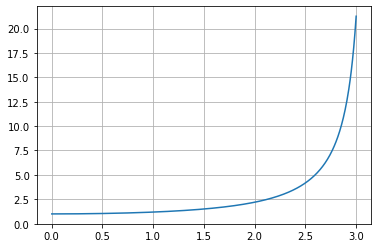

In [2]:
xx = np.linspace(1e-3, 3, 500)
yy = xx/np.sin(xx)
plt.plot(xx, yy)
plt.grid()
pass

Этот интеграл не берется в элементарных функциях.

Вычислим его численно при $a=0$, $b=3$:

In [3]:
a = 0
b = 3
n = 100
h = (b - a)/n
x = np.arange(a + h/2, b, h)
y = x/np.sin(x)
I_rect = h*sum(y)
I_rect

8.449457117179284

Как оценить точность полученного значения?
Давайте удвоим количество узлов и сравним полученные значения. Скорее всего, старшие цифры, в которых ответы совпадают, точные.

In [4]:
n2 = 200
h = (b - a)/n2
x = np.arange(a + h/2, b, h)
y = x/np.sin(x)
h*sum(y)

8.453808551489745

Таким образом, можем утверждать, что $I \approx 8.45$

С помощью функции `np.cumsum()` можно вычислять численно интеграл с переменным верхним пределом (первообразную):
$$
  I(x) = \int_0^x \frac{t}{\sin t} dt
$$

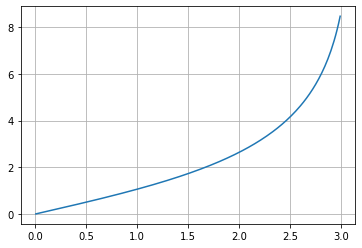

In [5]:
plt.plot(x, h*np.cumsum(y))
plt.grid()

## Формула трапеций

Пусть точки $x_k$ ($k=0,1,\dots, n$) удовлетворяют условиям ($*$).
Тогда
$$
  \int_a^b f(x) dx \approx \sum_{k=1}^n \frac{f(x_k) + f(x_k)}{2} \cdot (x_k - x_{k-1}).
$$
Эта формула называется *формулой трапеций*.
Она соответствует замене площади криволинейной трапеции на сумму площадей прямоугольных 
трапеций.

<img src=http://aco.ifmo.ru/el_books/numerical_methods/lectures/images/glava2_clip_image012.png>

Для равноотстоящих узлов имеем
$$
  \int_a^b f(x) dx \approx h \, 
     \left( \frac{f(x_0) + f(x_n)}{2} + f(x_1) + f(x_2) + \dots + f(x_{n-1}) \right).
$$
Если $f(x)$ дважды непрерывно дифференцируема на отрезке $[a, b]$, 
то для остаточного члена формулы трапеций справедливо:
$$
  R = \frac{b-a}{12} f''(\xi)\, h^2, \quad \mbox{где $\xi \in [a, b]$}.
$$
*Также имеем 2-й порядок сходимости, как и для формулы центральных прямоугольников.*

Метод трапеций реализует функция `trapz()` из модуля `scipy.integrate`.
Есть два варианта обращения к ней: с одним входным аргументом
и с двумя. Если вектор `x` содержит узлы, а `y` - значения функции в этих узлах, то
`trapz(y, x)`
численно вычисляет значение определенного интеграла по формуле трапеций.

Вычислим интеграл ($**$) по формуле трапеций введем:

In [6]:
a = np.finfo(float).eps
b = 3
n = 100
h = (b - a)/n
x = np.linspace(a, b, n + 1)
y = x/np.sin(x)
I_trapz = integrate.trapz(y, x)
I_trapz

8.466935060243005

В точке $0$ функция имеет (устранимую) особенность,
поэтому мы отступили от $0$ на машинное эпсилон.

Вариант функции `trapz` вида `trapz(y)`
предназначен для интегрирования по формуле трапеций с равноотстоящими узлами.
Чтобы получить численное значение интеграла, 
необходимо значение `trapz(y)` домножить на шаг интегрирования $h$.

In [7]:
integrate.trapz(y)*h

8.466935060243006

## Правило Симпсона

Пусть точки $x_k$ ($k=0,1,\dots, n$) 
удовлетворяют условиям ($*$), $n$ четно.
Заменяя на каждом отрезке $[x_k, x_{k+2}]$ $(k=0,2,4,\dots,n)$
подынтегральную функцию $f(x)$ ее интерполяционным многочленом $f_k(x)$ $2$-го порядка,
построенным по узлам $x_k$, $x_{k+1}$, $x_{k+2}$, 
и интегрируя эти многочлены, мы приходим
к *формуле Симпсона*. В частности, для случая равноотстоящих узлов
получим:
$$
  \int_a^b f(x) dx \approx 
\frac{h}{3} 
\Bigl(
  y_0 + y_n
  + 2\bigl(f(x_2) + f(x_4) + \dots + f(x_{n-2})\bigr)
  + 4\bigl(f(x_1) + f(x_3) + \dots + f(x_{n-1})\bigr)
\Bigr).
$$

<img src='http://aco.ifmo.ru/el_books/numerical_methods/lectures/images/glava2_clip_image025.png'>

Если функция $f(x)$ имеет непрерывную на отрезке $[a, b]$
производную $4$-го порядка, то для остаточного члена формулы Симпсона справедливо:
$$
  R = \frac{b-a}{180} f^{IV}(\xi)\, h^4, \quad \mbox{где $\xi \in [a, b]$}.
$$
Обратите внимание, что *поряок сходимости для формулы Симпсона составляет 4, т.е. эта формула намного точнее формул прямоугольников и трапеций*.
Метод Симпсона реализован в функции `simps` модуля `scipy.integrate`:

In [8]:
I_simps = integrate.simps(y, x)
I_simps

8.455462165555241

In [9]:
integrate.simps(y)*h

8.455462165555243

Значения, которые мы получили, разбивая отрезок интегрирования на 100 частей. Ожидаемо, правило Симпсона должно давать наиболее точный результат. Сравнивая его с относительно точным значением, полученным адаптивными функциями ниже, установим, что правилосимпсона со 100 узлами дало 4 верные значащие цифры ($8.455$).


In [10]:
print('Rectangaular method ', I_rect)
print('Trapezoidal  method ', I_trapz)
print('Simpson rule        ', I_simps)

Rectangaular method  8.449457117179284
Trapezoidal  method  8.466935060243005
Simpson rule         8.455462165555241


## Автоматический выбор шага


Как мы уже отмечали, для оценки точности вычисленного значения интеграла можно увеличивать количество узлов, например, вдвое, и сравнивать полученный ответ с предыдущим. Если они отличаются незначительно, то можно считать, что необходимаю точность получена. Иначе можно еще раз увеличить количество узлов вдвое и т.д.

Более интеллектуальная стратегия - увеличивать количество точек не на всем отрезке интегрирования, а только на проблемных участках - такого сорта алгоритмы называются адаптивными, так как они подстариваются (адаптируются) под поведение функции на конкретном участке. Например, применим метод Симпсона к заданной функции для $3$ и $5$ точек и сравним результаты. Если разница превышает некоторый порог, то разобьем отрезок интегрирования на два равных отрезка и применим к каждому из них тот же алгорритм рекурсивно.

Функция `quad` из модуля `scipy.integrate` реализует некоторый сложный адаптивный алгоритм численного вычисления интеграла.

Форма обращения к функции `quad` следующая:
```
    I, abserr = quad(f, a, b)
```
здесь $a$, $b$ - начало и конец отрезка интегрирования (могут быть $\pm$`np.Inf`), а
`f` - подынтегральная функция, `abserr` - полученная абсолютная ошибка.

Для функции `quad` можно задавать некоторые другие параметры, в частности,
можно задать абсолютную `epsabs` и относительную `epsabs` ошибки для остановки алгоритма
(по умолчанию они равны $1.49\times 10^{-8}$). 

In [11]:
def fun(x):
    return x/np.sin(x)

I, abserr = integrate.quad(fun, np.finfo(float).eps, 3)
I, abserr

(8.45527024499398, 2.6426765123466225e-11)

Интеграл вычислен с 10 верными значащими цифрами. 

In [12]:
I, abserr = integrate.quad(fun, np.finfo(float).eps, 3, epsabs = 1e-3)
I, abserr

(8.455270245966526, 0.0005948624018474938)

## Выводы

* Для достаточно гладких функций 
    * метод левых и правых прямоугольников имеет 1-й порядок сходимости,
    * средних прямоугольников и метод трапеций - 2-й порядок, 
    * метом Симпсона - самый точный - 4-й порядок сходимости.

* Для вычисления интеграла с необхоимой точностью используют адаптивные алгоритмы.

